# ML End-to-End Projekt: Student Performance Prediction

**Autoren:** [Ihre Namen einfügen]  
**Datum:** Oktober 2025  
**OST - Ostschweizer Fachhochschule**

![OST Logo](https://www.ost.ch/de/mediathek/_jcr_content/root/stage/image.img.3.high.jpg/1662646826512.jpg)

---

## (b) Einleitung

### Beschreibung der Aufgabe
Dieses Projekt befasst sich mit der Vorhersage der Prüfungsleistung (Exam_Score) von Studenten basierend auf verschiedenen Einflussfaktoren. Der Datensatz enthält 20 verschiedene Features, die verschiedene Aspekte des studentischen Lebens abbilden, darunter Lerngewohnheiten (Hours_Studied), Anwesenheit (Attendance), sozioökonomische Faktoren (Family_Income, Parental_Education_Level), persönliche Faktoren (Sleep_Hours, Motivation_Level) sowie schulische Rahmenbedingungen (Teacher_Quality, School_Type).

### Anwendungsbereich
Das entwickelte Modell kann in verschiedenen Bereichen des Bildungssektors eingesetzt werden:
- **Frühwarnsysteme** für gefährdete Studenten, die Unterstützung benötigen
- **Personalisierte Lernempfehlungen** basierend auf identifizierten Schwachstellen
- **Ressourcenallokation** durch Bildungseinrichtungen zur gezielten Förderung
- **Beratung** von Studenten und Eltern zur Optimierung der Lernbedingungen

### Bedeutung
Die frühzeitige Identifikation von Studenten mit Leistungsrisiken ermöglicht präventive Maßnahmen und gezielte Interventionen. Durch die Analyse der wichtigsten Einflussfaktoren können Bildungseinrichtungen datenbasierte Entscheidungen treffen, um die Lernergebnisse zu verbessern und Chancengleichheit zu fördern. Dies trägt zur Reduktion von Studienabbrüchen bei und erhöht die Gesamtqualität der Bildung.

---

## (c) Zielsetzung und Vorgehensweise

### Zielsetzung
**Hauptziel:** Entwicklung eines Machine Learning Modells zur präzisen Vorhersage des Exam_Score von Studenten (kontinuierlicher Wert zwischen 0 und 100 Punkten).

**Teilziele:**
1. Identifikation der wichtigsten Einflussfaktoren auf die Prüfungsleistung
2. Entwicklung einer robusten ML-Pipeline für Datenverarbeitung und Modelltraining
3. Vergleich verschiedener Regressionsalgorithmen
4. Optimierung des besten Modells durch Hyperparameter-Tuning

### Ansatz
1. **Explorative Datenanalyse (EDA):** Verstehen der Datenstruktur, Identifikation von Mustern, Ausreißern und Korrelationen
2. **Data Preprocessing:** Behandlung fehlender Werte, Feature Engineering, Encoding kategorischer Variablen
3. **Feature Selection:** Identifikation der relevantesten Features
4. **Pipeline-Entwicklung:** Aufbau einer automatisierten ML-Pipeline für reproduzierbare Ergebnisse
5. **Modellvergleich:** Evaluation verschiedener Algorithmen (No Free Lunch Theorem)
6. **Hyperparameter-Tuning:** Optimierung des besten Modells mittels Grid Search oder Random Search
7. **Kreuzvalidierung:** Robuste Bewertung der Modellleistung
8. **Final Testing:** Evaluation auf Test-Set

### Metrik
**Primäre Metrik:** **RMSE (Root Mean Squared Error)**  
- RMSE bestraft größere Fehler stärker und ist gut interpretierbar in den Original-Einheiten (Punkte)

**Zielvorgabe:** RMSE < 5.0 Punkte (entspricht ca. 5% Fehler bei einer Skala von 0-100)

### Sekundäre Metriken
- **R² Score:** Anteil der erklärten Varianz (Ziel: R² > 0.70)
- **MAE (Mean Absolute Error):** Durchschnittlicher absoluter Fehler
- **MAPE (Mean Absolute Percentage Error):** Prozentuale Abweichung

---

## (d) Explorative Datenanalyse (EDA)

### 3.1 Daten laden und erste Inspektion

---

In [1]:
# Bibliotheken importieren
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Regression Modelle
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Metriken
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Weitere Libraries nach Bedarf
import warnings
warnings.filterwarnings('ignore')

# Plotting Einstellungen
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

In [2]:
# Daten laden
# TODO: Pfad zur CSV-Datei anpassen
df = pd.read_csv('StudentPerformanceFactors.csv')

In [3]:
# Erste Inspektion
print("=== Datensatz Übersicht ===")
print(f"Anzahl Zeilen: {df.shape[0]}")
print(f"Anzahl Spalten: {df.shape[1]}")
print("\n=== Erste 5 Zeilen ===")
display(df.head())
print("\n=== Datentypen ===")
print(df.dtypes)
print("\n=== Fehlende Werte ===")
print(df.isnull().sum())
print("\n=== Statistische Kennzahlen ===")
display(df.describe())

=== Datensatz Übersicht ===
Anzahl Zeilen: 6607
Anzahl Spalten: 20

=== Erste 5 Zeilen ===


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70



=== Datentypen ===
Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities         object
Parental_Education_Level      object
Distance_from_Home            object
Gender                        object
Exam_Score                     int64
dtype: object

=== Fehlende Werte ===
Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Prev

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


### 3.2 Datenbereinigung und Verständnis

---

In [ ]:
# Fehlende Werte behandeln
# Insgesamt nur wenige (64) fehlende Werte vorhanden, deshalb löschen wir diese Zeilen
df.dropna(inplace=True)

# Duplikate prüfen
df.duplicated().sum()



np.int64(0)

In [6]:
# Kategorische Variablen identifizieren und deren Unique Values anzeigen
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")
    print (df[col].values)



Parental_Involvement: 3 unique values
['Low' 'Low' 'Medium' ... 'Medium' 'High' 'Medium']
Access_to_Resources: 3 unique values
['High' 'Medium' 'Medium' ... 'Low' 'High' 'Low']
Extracurricular_Activities: 2 unique values
['No' 'No' 'Yes' ... 'Yes' 'Yes' 'Yes']
Motivation_Level: 3 unique values
['Low' 'Low' 'Medium' ... 'Low' 'High' 'Medium']
Internet_Access: 2 unique values
['Yes' 'Yes' 'Yes' ... 'Yes' 'Yes' 'Yes']
Family_Income: 3 unique values
['Low' 'Medium' 'Medium' ... 'Low' 'Low' 'Medium']
Teacher_Quality: 3 unique values
['Medium' 'Medium' 'Medium' ... 'Medium' 'Medium' 'Medium']
School_Type: 2 unique values
['Public' 'Public' 'Public' ... 'Public' 'Private' 'Public']
Peer_Influence: 3 unique values
['Positive' 'Negative' 'Neutral' ... 'Negative' 'Positive' 'Positive']
Learning_Disabilities: 2 unique values
['No' 'No' 'No' ... 'No' 'No' 'No']
Parental_Education_Level: 3 unique values
['High School' 'College' 'Postgraduate' ... 'Postgraduate' 'High School'
 'Postgraduate']
Distan

### 3.3 Univariate Analyse

Analyse einzelner Variablen zur Verteilungsanalyse

---

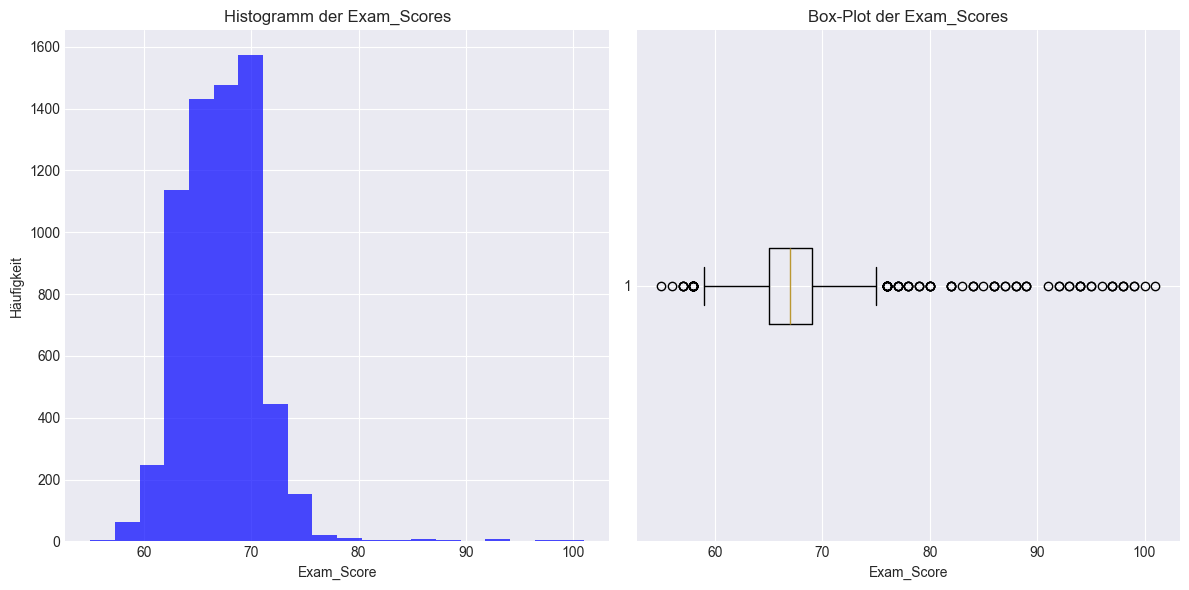

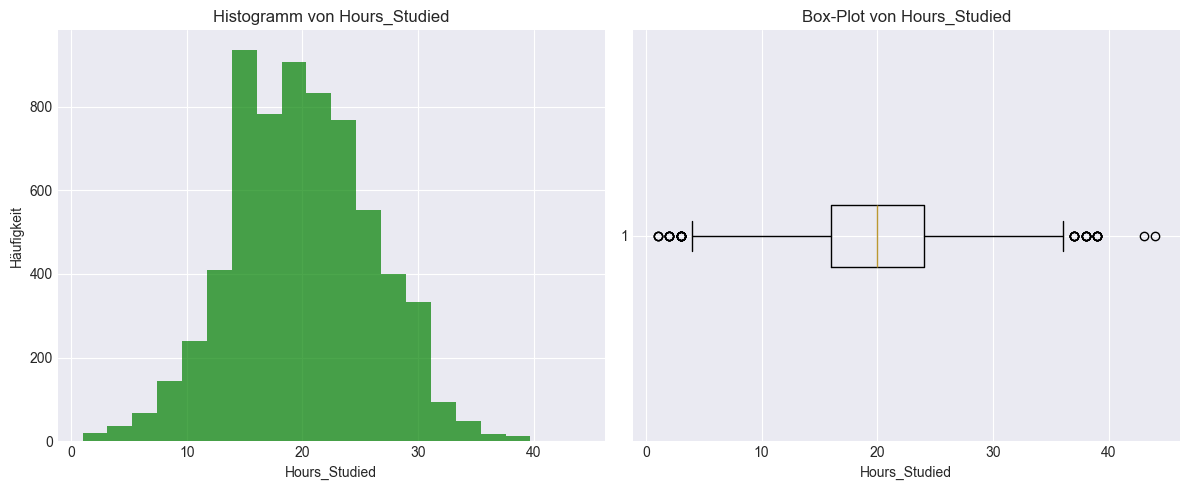

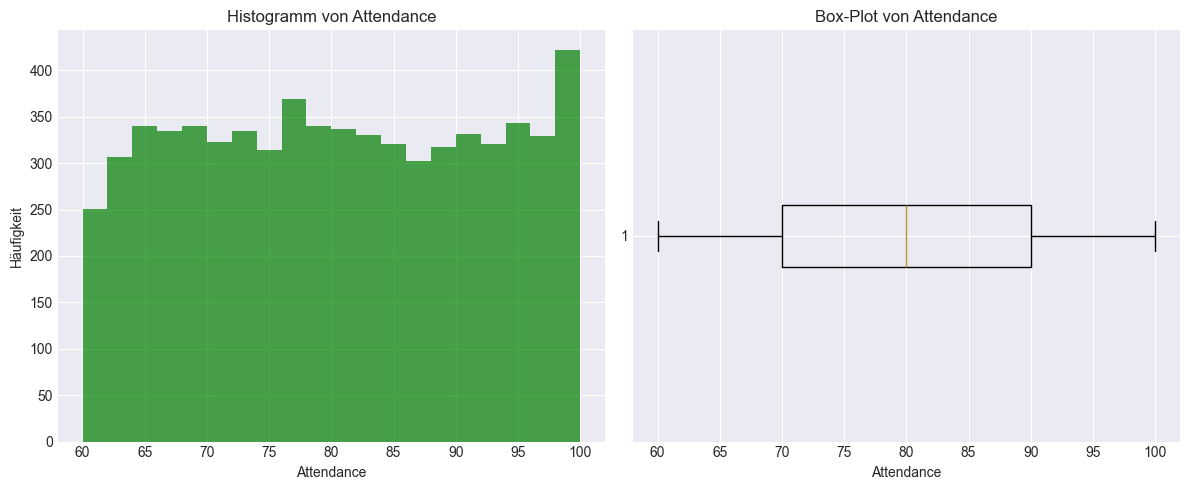

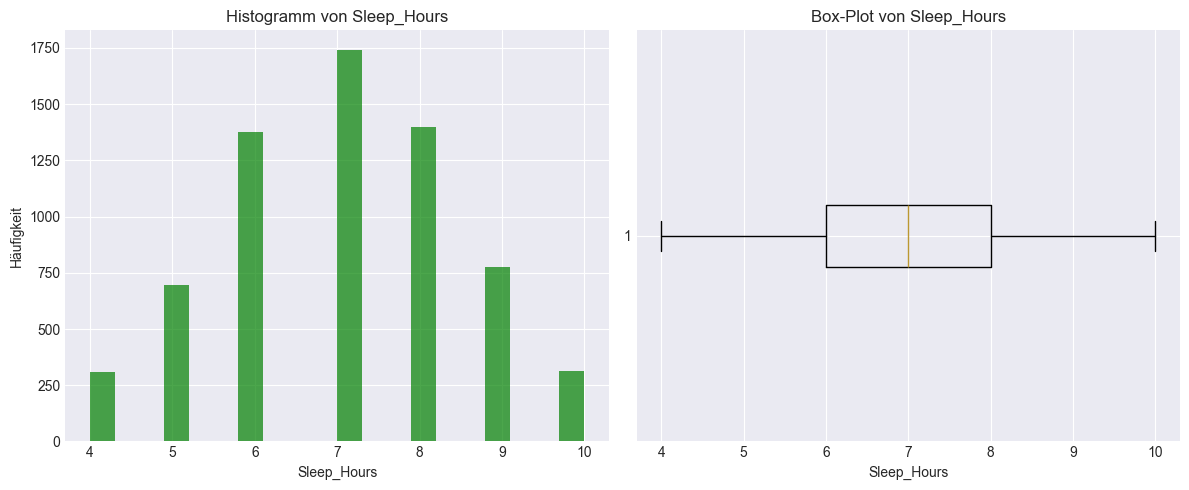

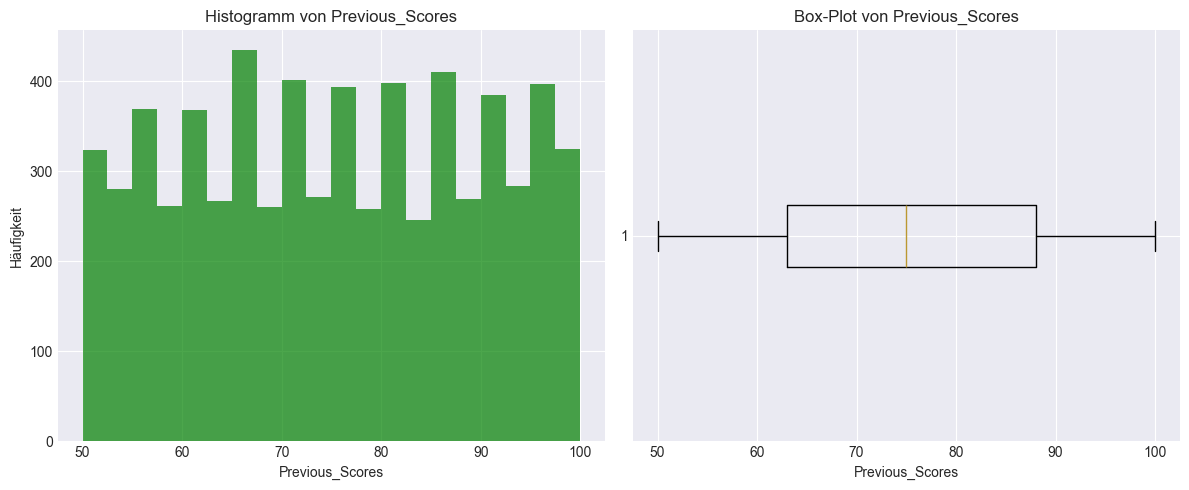

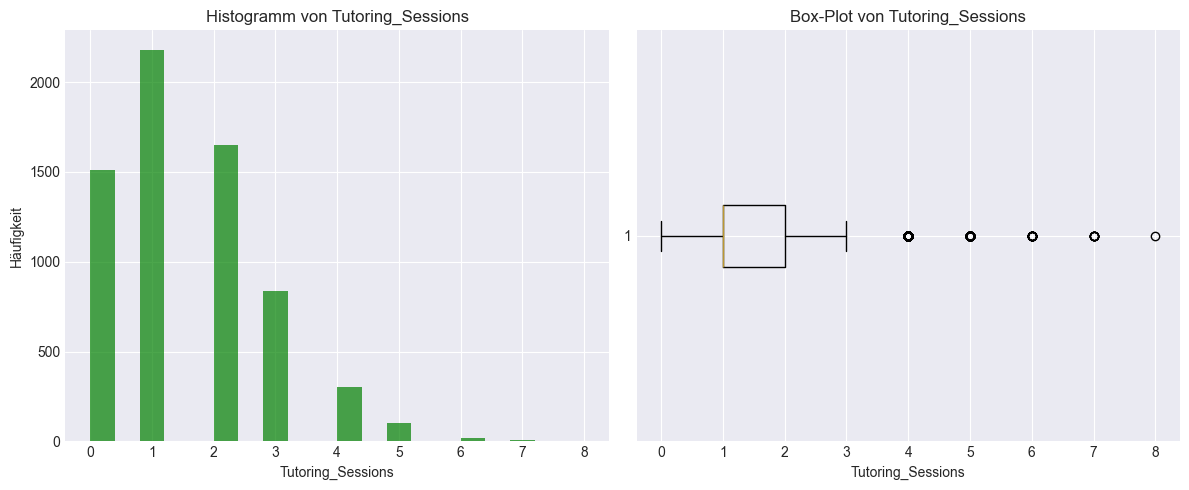

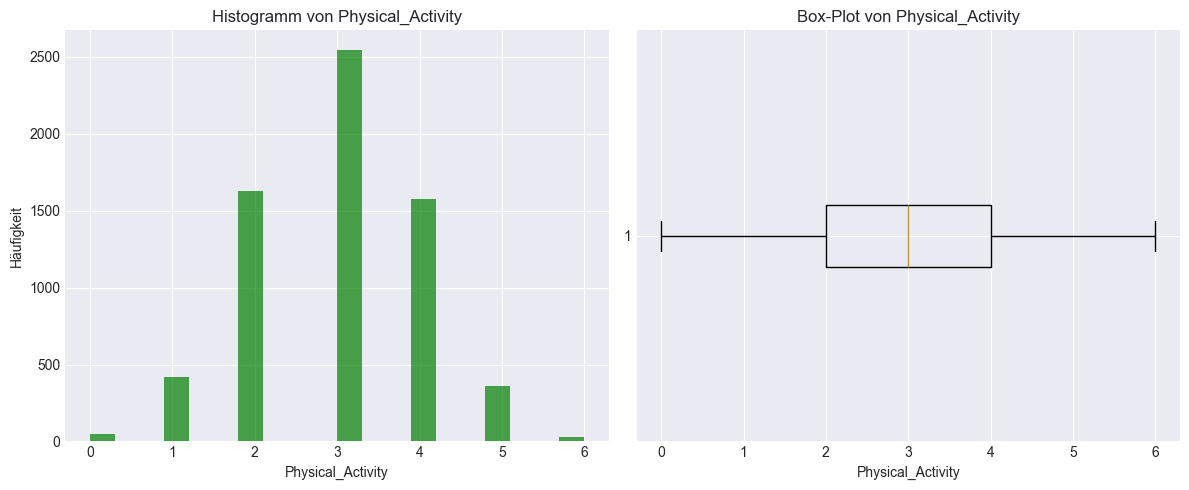

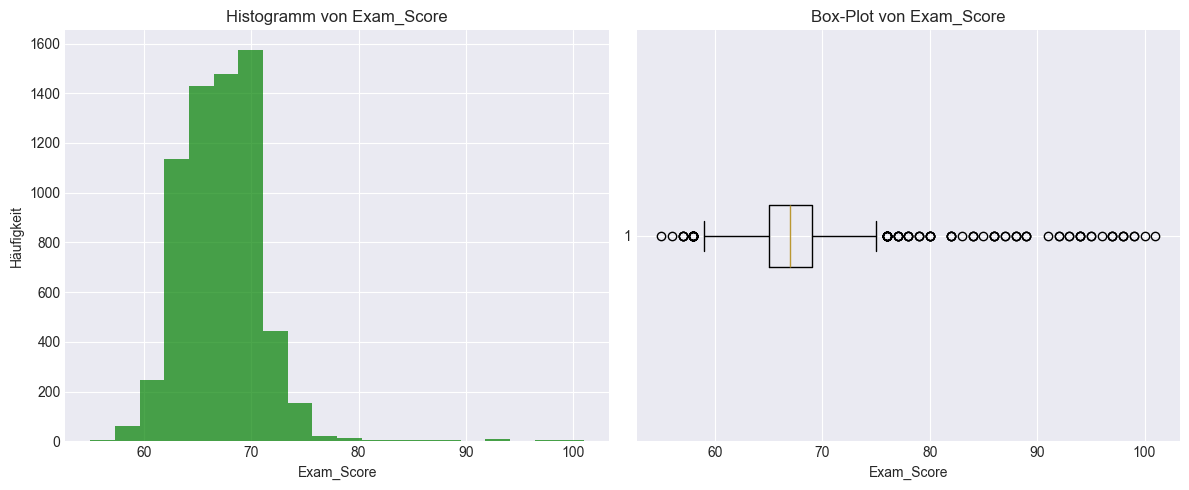

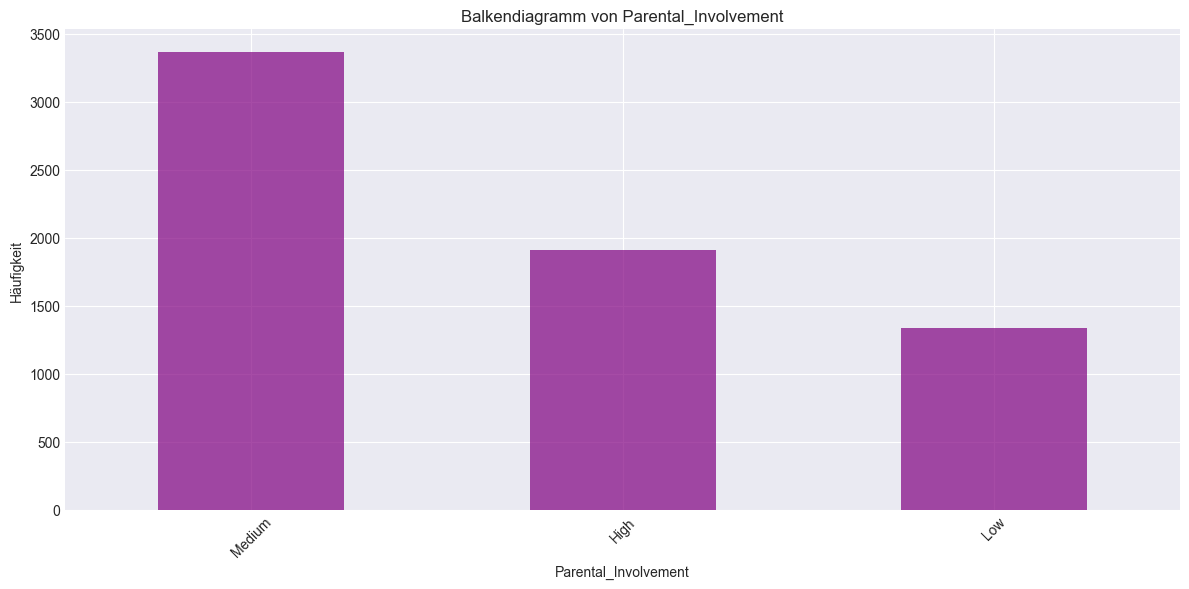

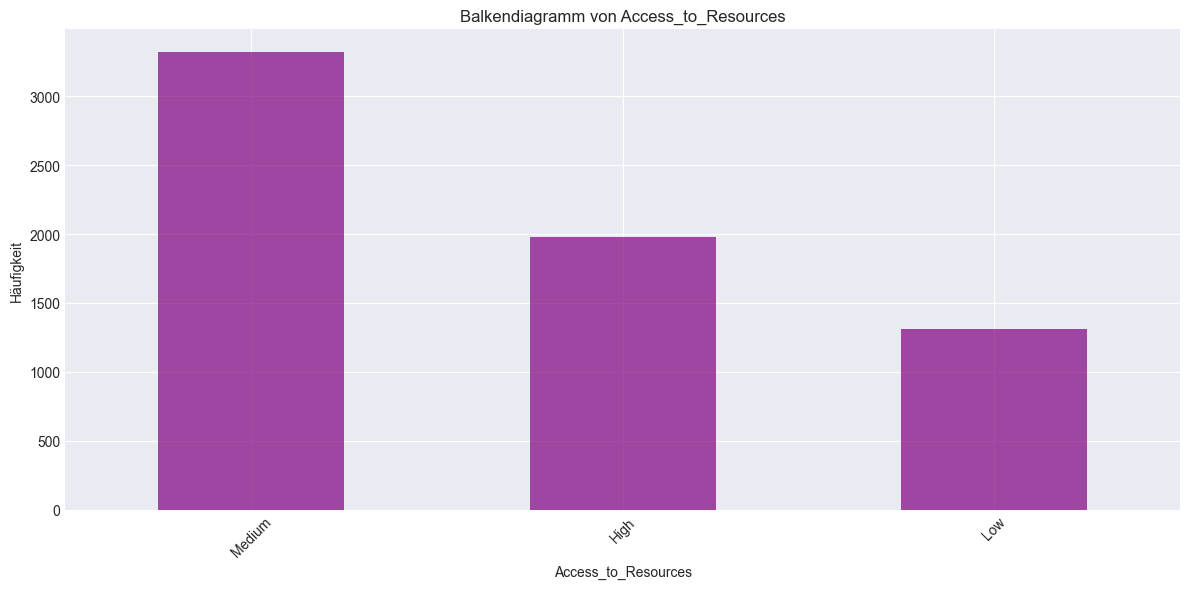

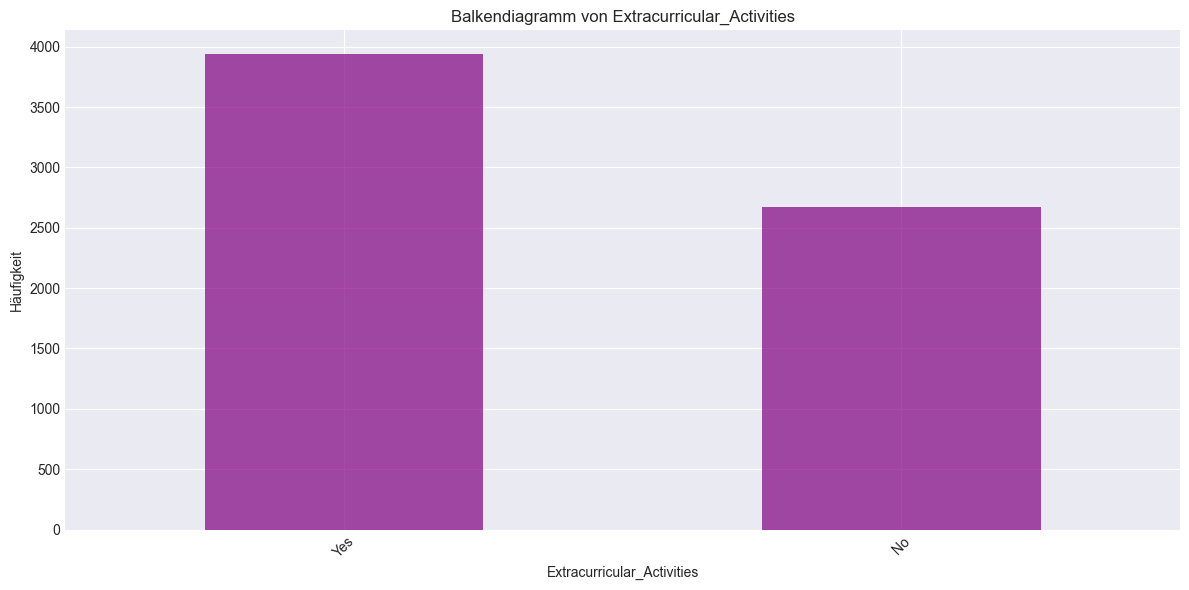

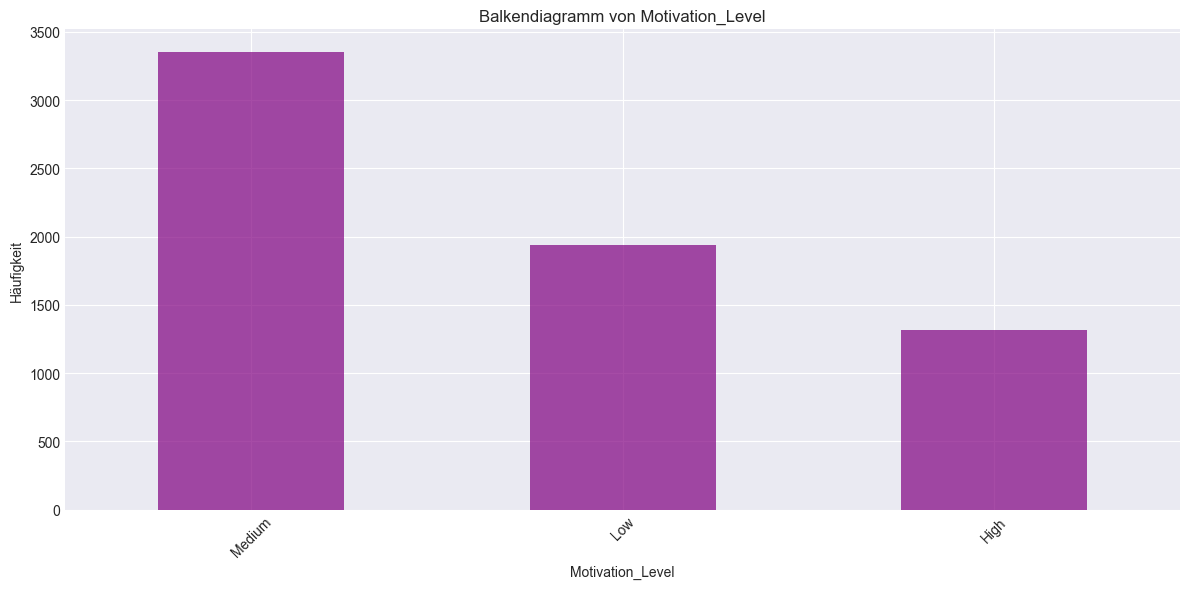

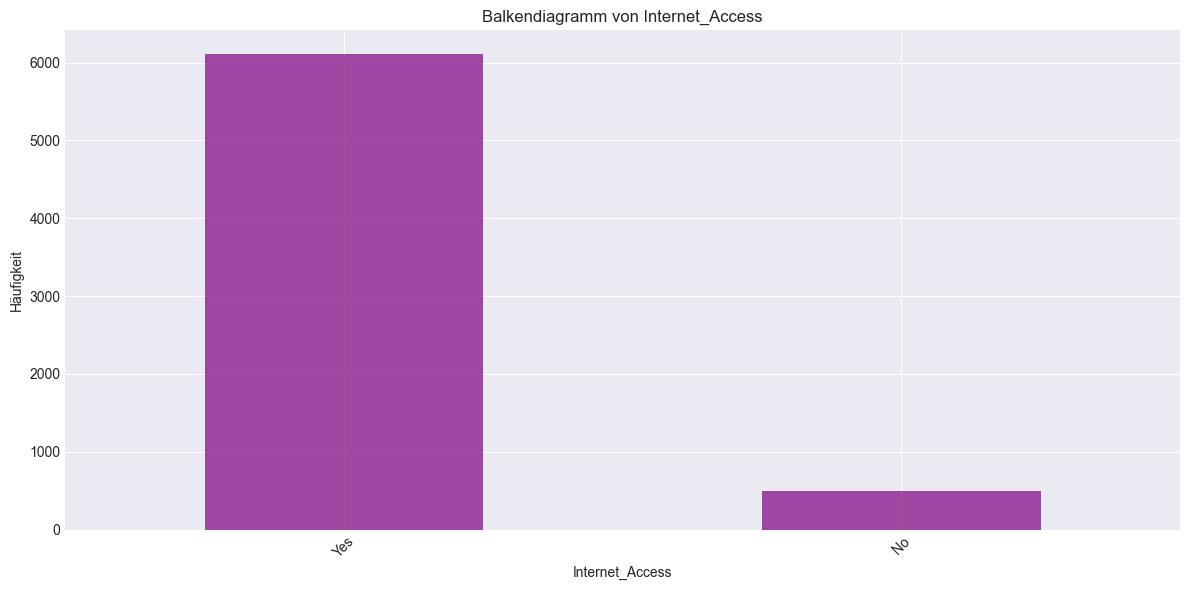

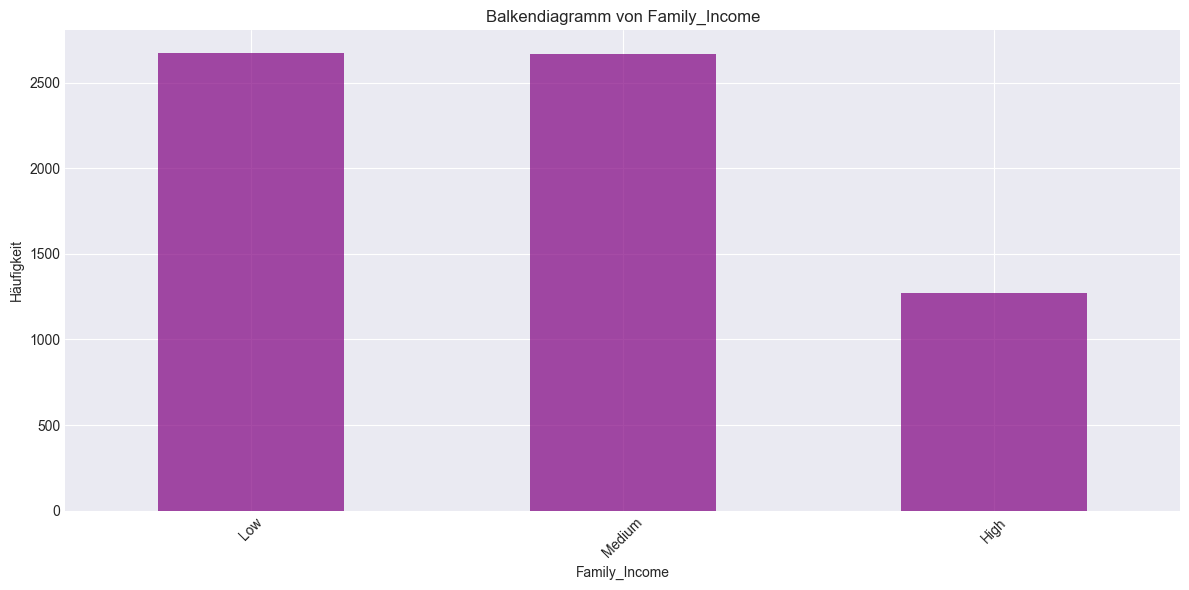

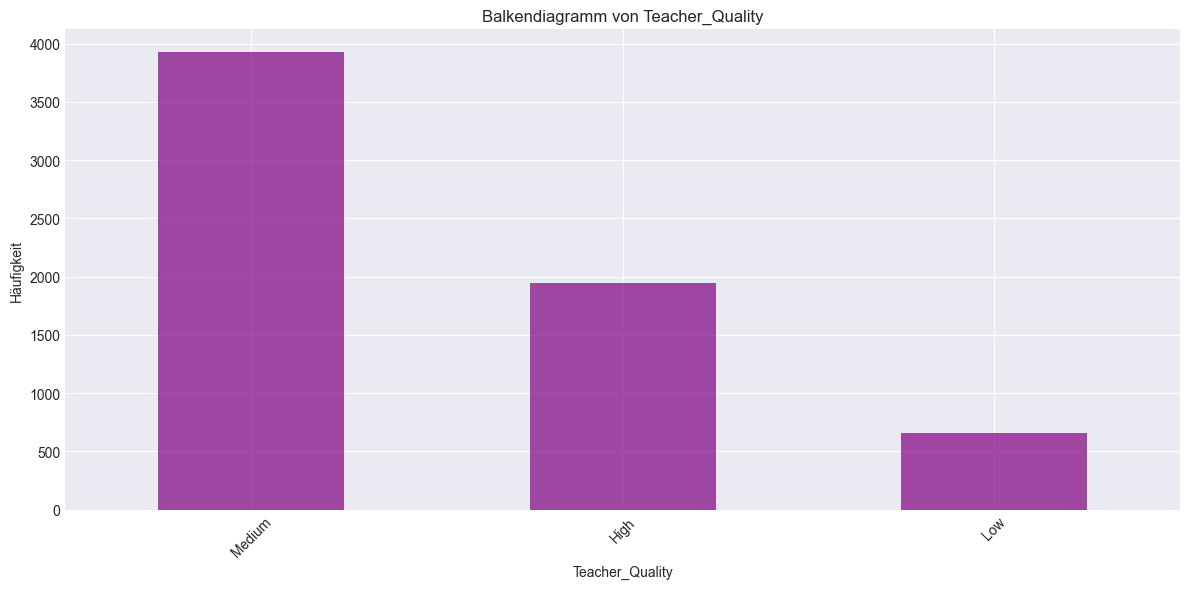

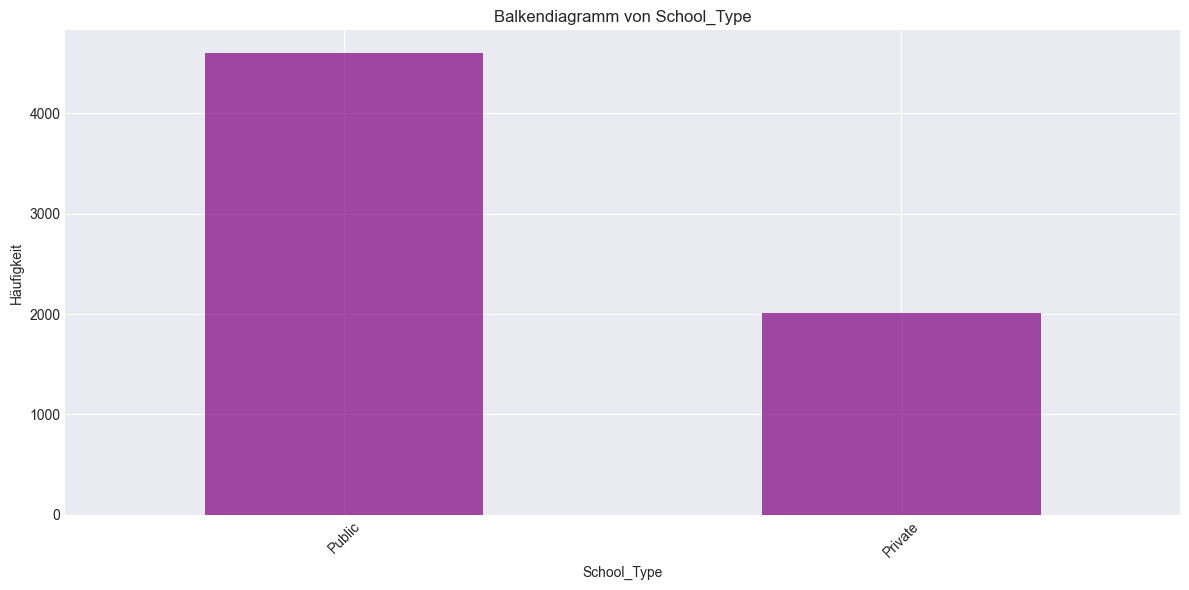

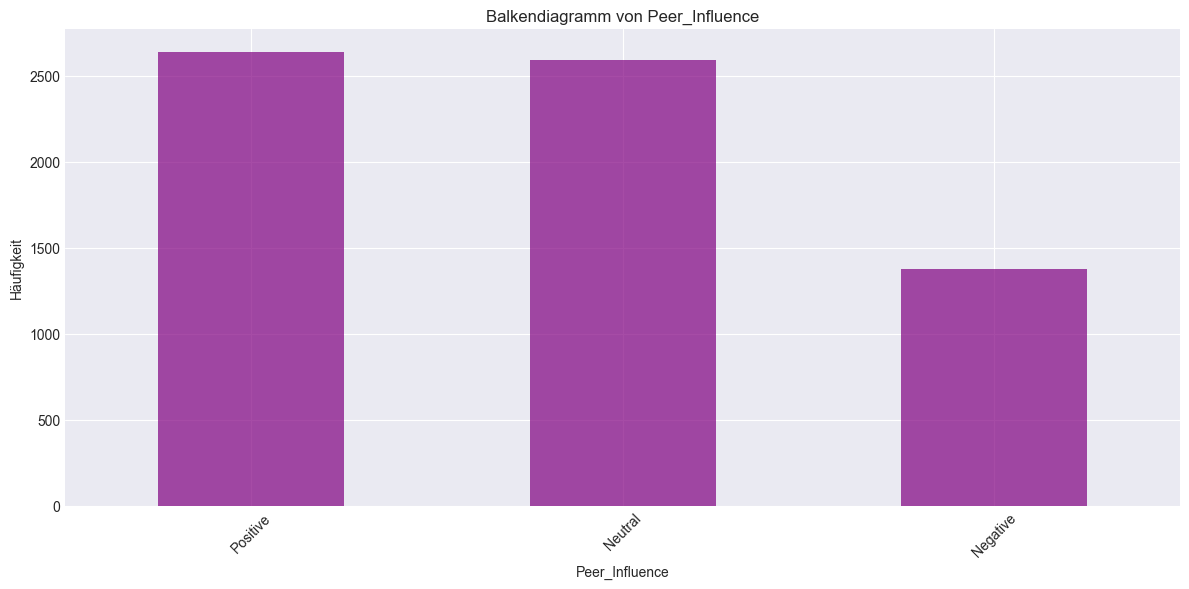

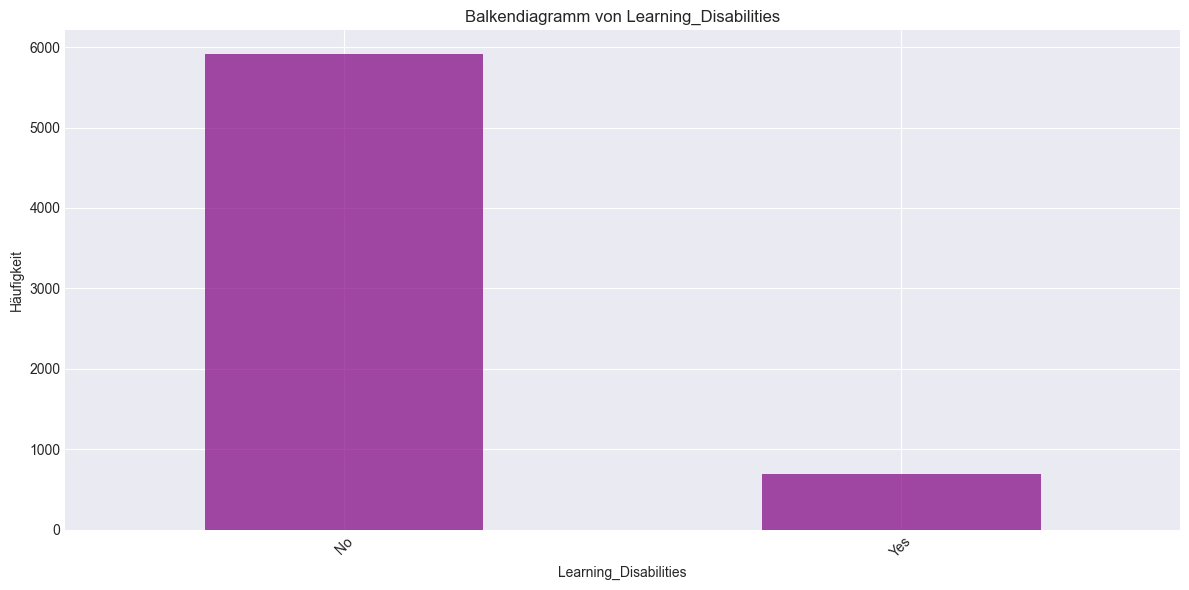

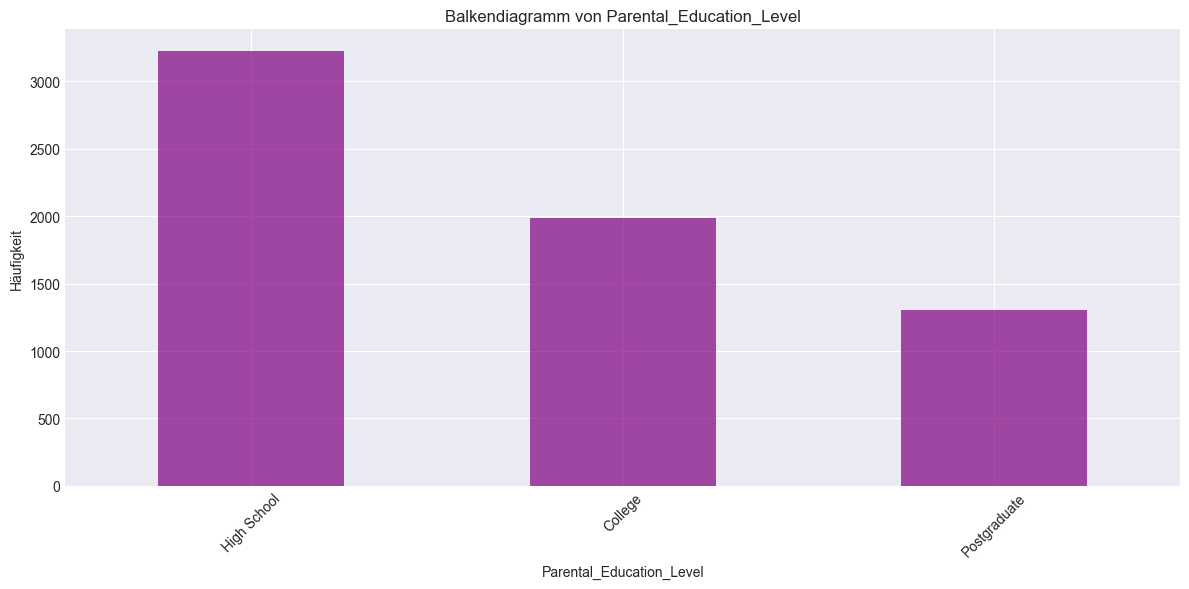

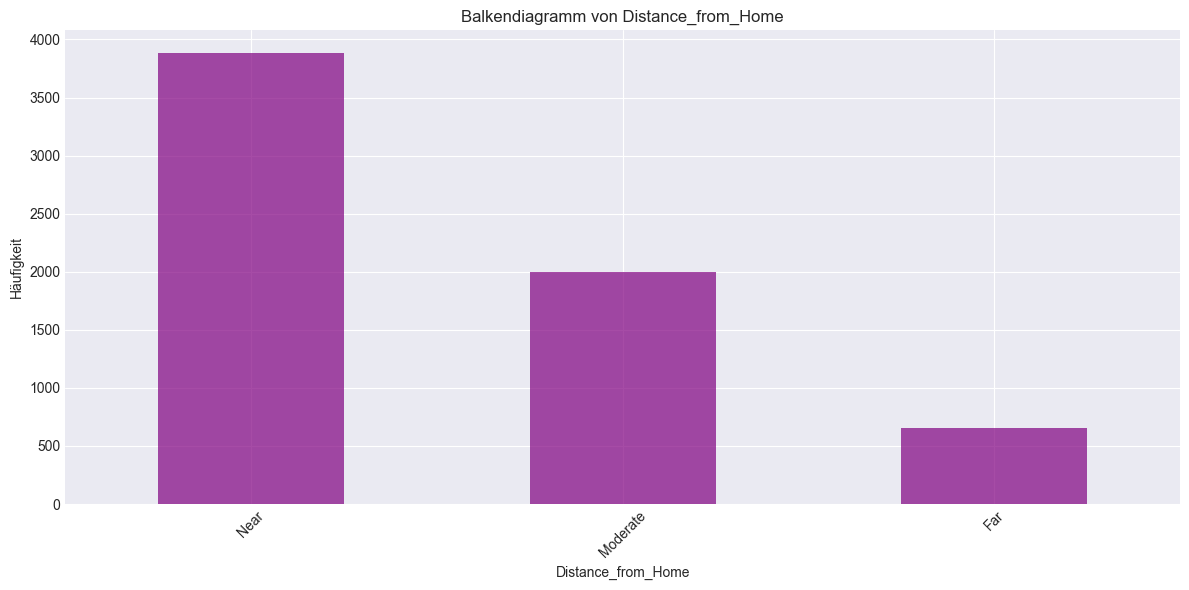

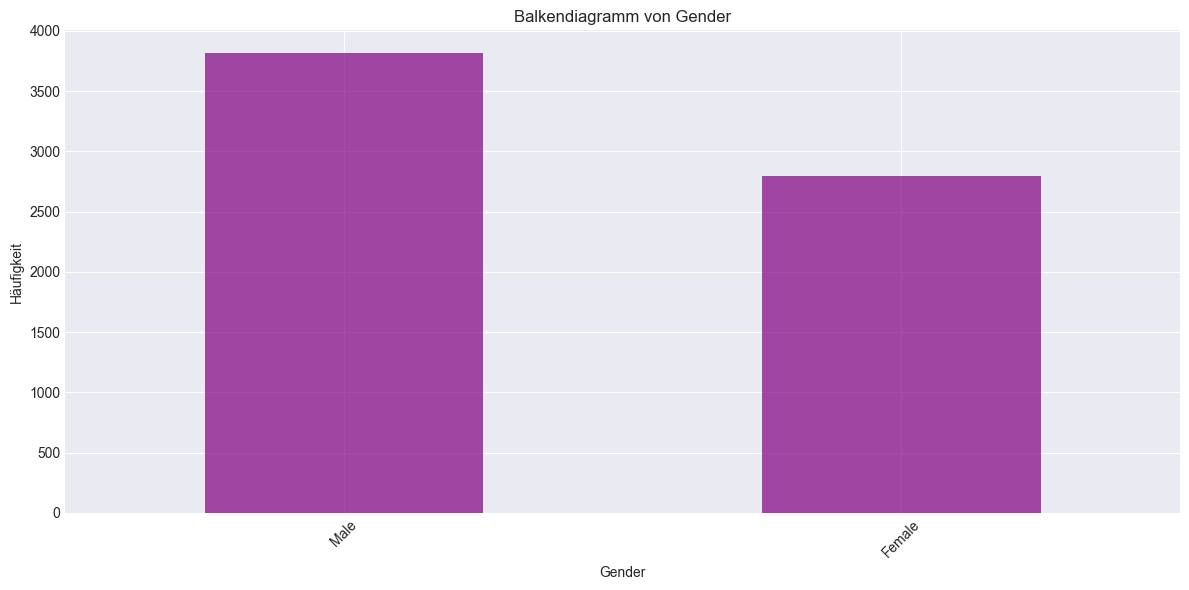

In [7]:
# Verteilung der Zielvariable (Exam_Score) visualisieren
# Histogramm, Box-Plot, etc.
import matplotlib.pyplot as plt

# Histogramm
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['Exam_Score'], bins=20, color='blue', alpha=0.7)
plt.title('Histogramm der Exam_Scores')
plt.xlabel('Exam_Score')
plt.ylabel('Häufigkeit')

# Box-Plot
plt.subplot(1, 2, 2)
plt.boxplot(df['Exam_Score'], vert=False)
plt.title('Box-Plot der Exam_Scores')
plt.xlabel('Exam_Score')

plt.tight_layout()
plt.show()

# Verteilung numerischer Features visualisieren
numerical_cols = df.select_dtypes(include=[np.number]).columns
for col in numerical_cols:
    plt.figure(figsize=(12, 5))
    
    # Histogramm
    plt.subplot(1, 2, 1)
    plt.hist(df[col], bins=20, color='green', alpha=0.7)
    plt.title(f'Histogramm von {col}')
    plt.xlabel(col)
    plt.ylabel('Häufigkeit')
    
    # Box-Plot
    plt.subplot(1, 2, 2)
    plt.boxplot(df[col], vert=False)
    plt.title(f'Box-Plot von {col}')
    plt.xlabel(col)
    
    plt.tight_layout()
    plt.show()

# Verteilung kategorischer Features visualisieren (Bar Charts)
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    plt.figure(figsize=(12, 6))
    df[col].value_counts().plot(kind='bar', color='purple', alpha=0.7)
    plt.title(f'Balkendiagramm von {col}')
    plt.xlabel(col)
    plt.ylabel('Häufigkeit')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### 3.4 Bivariate Analyse

Analyse der Beziehung zwischen Features und der Zielvariable

---

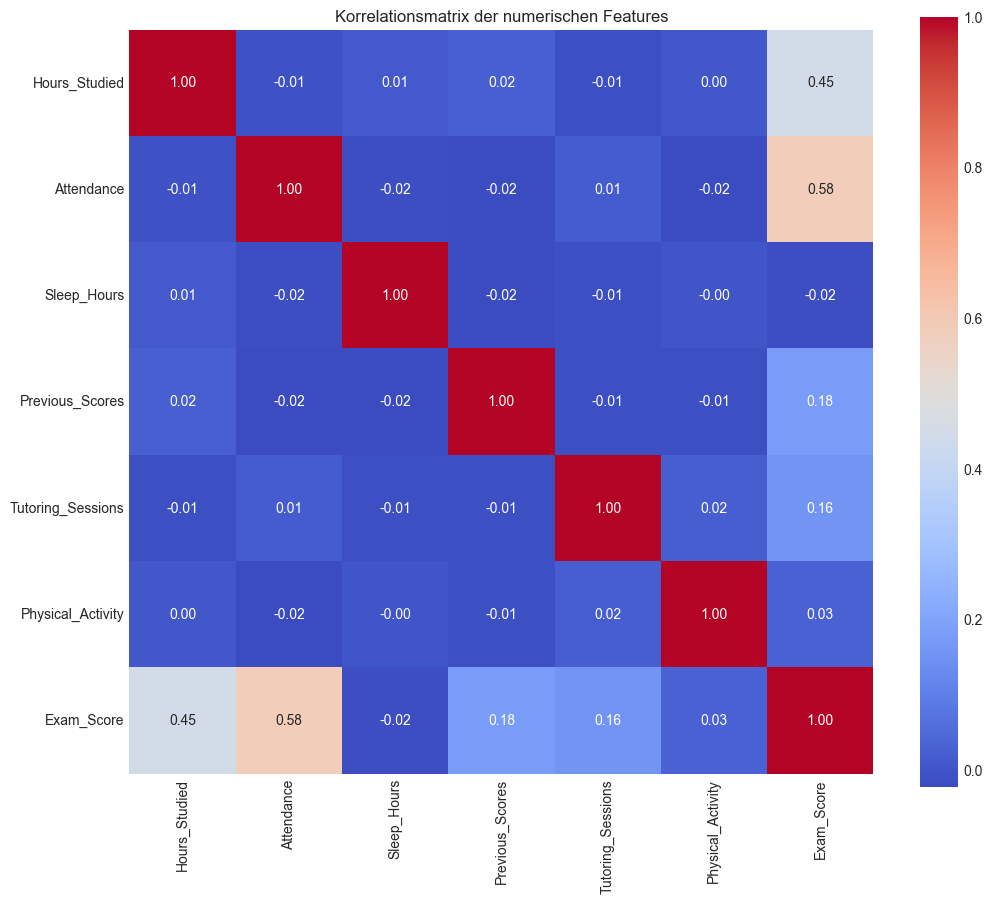

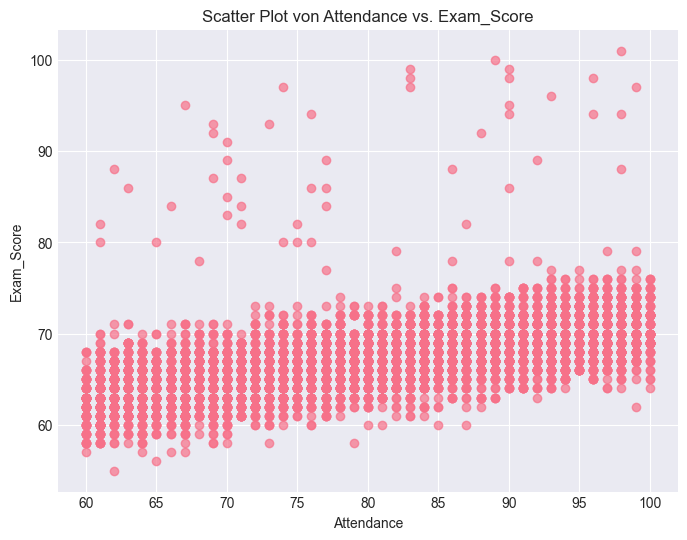

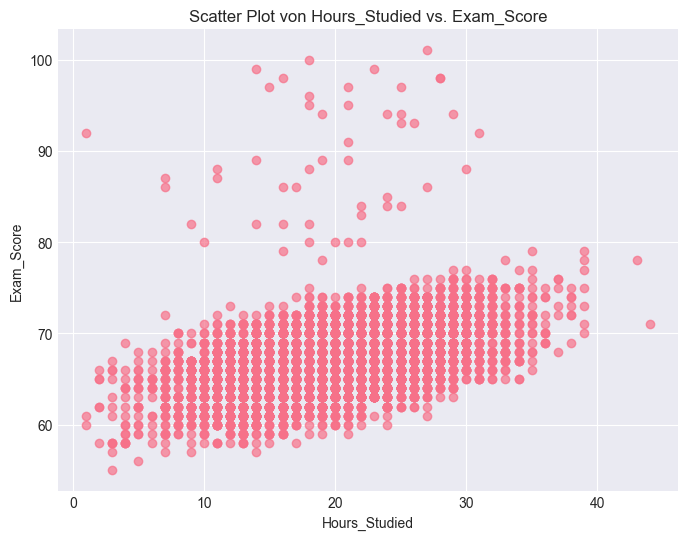

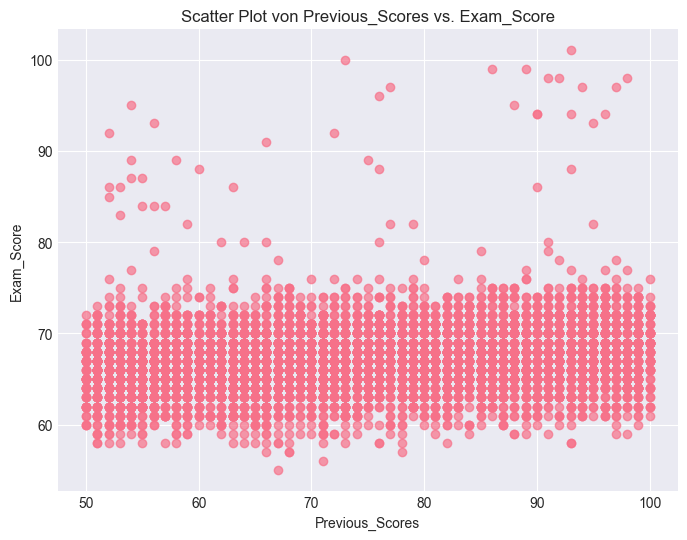

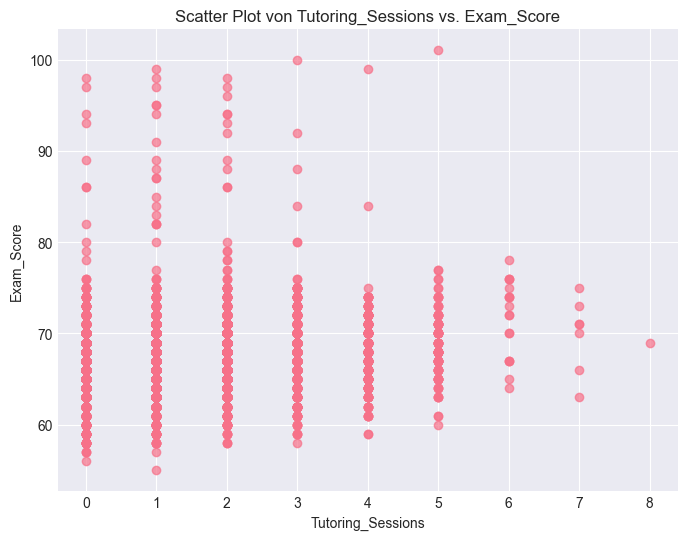

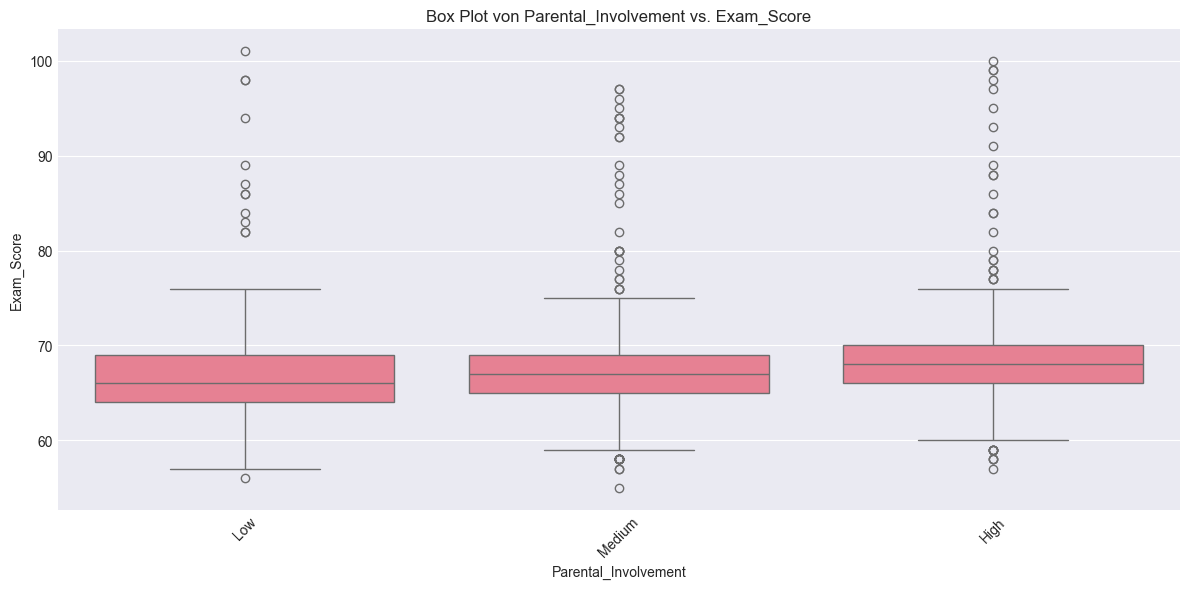

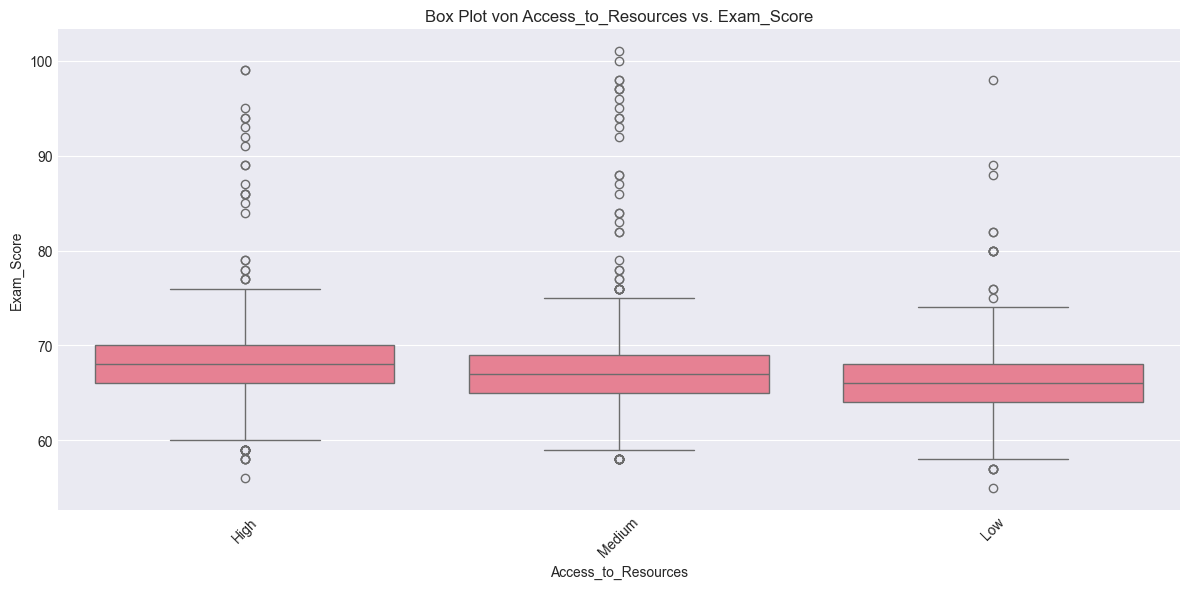

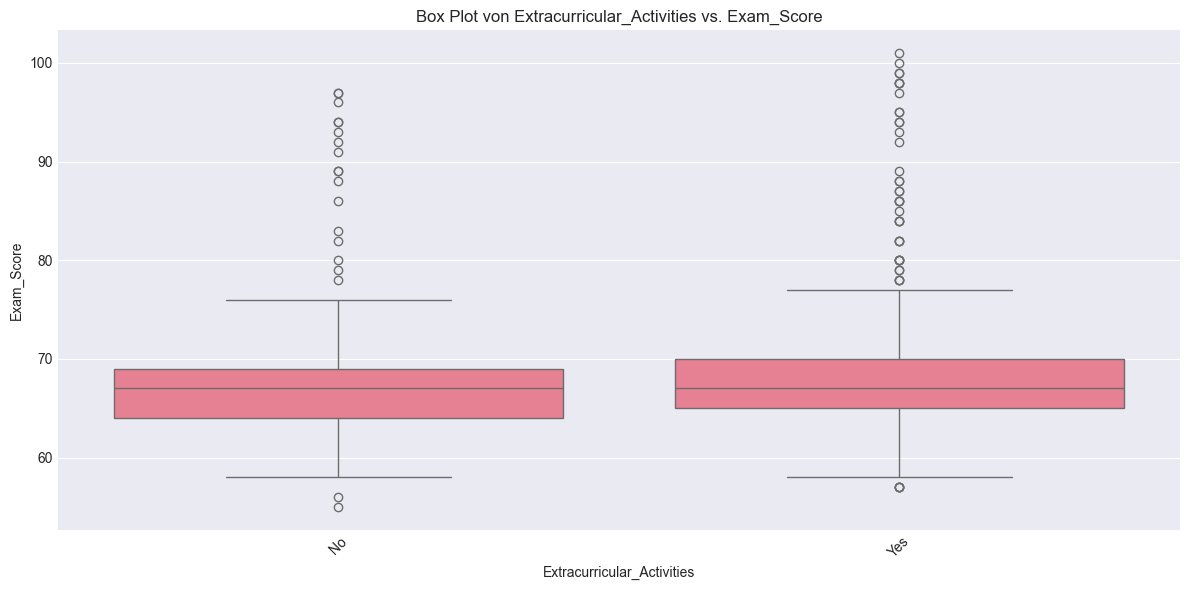

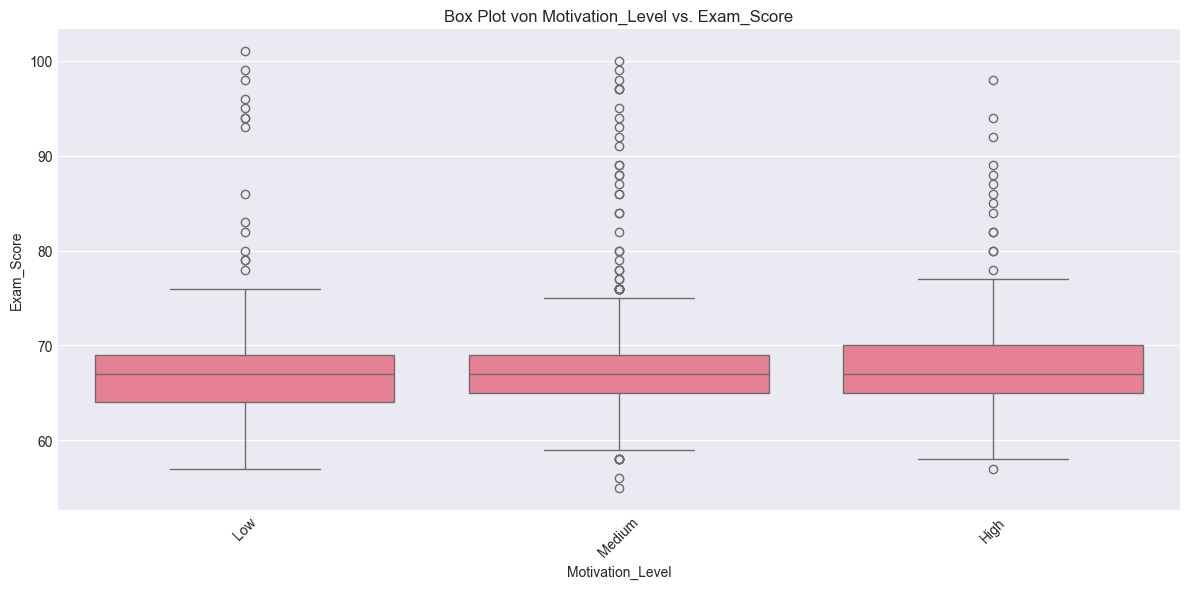

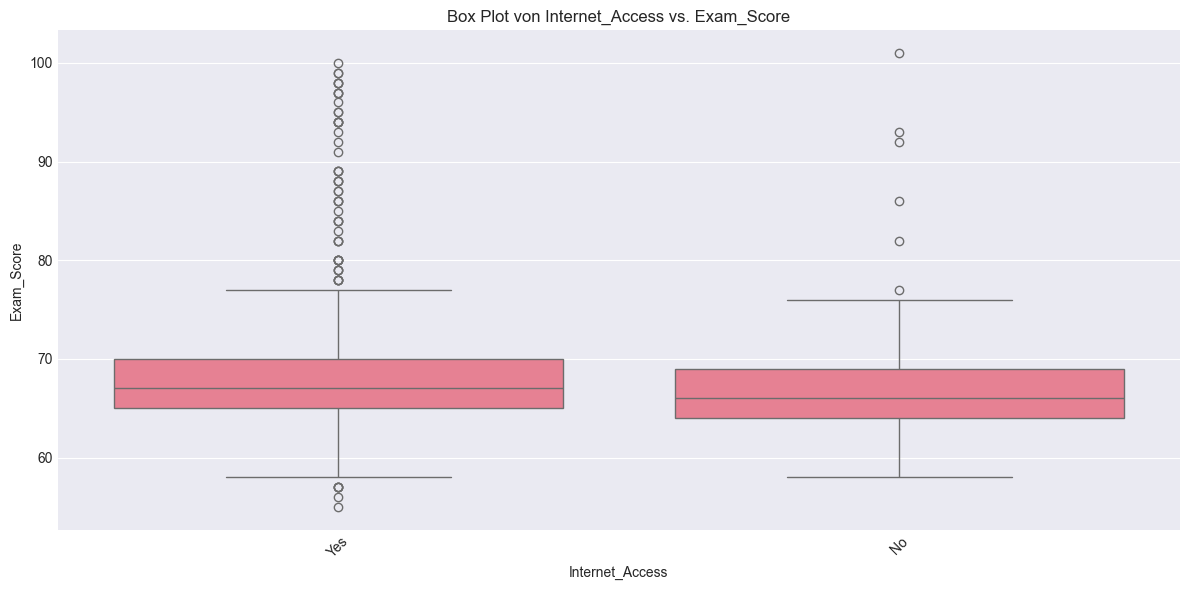

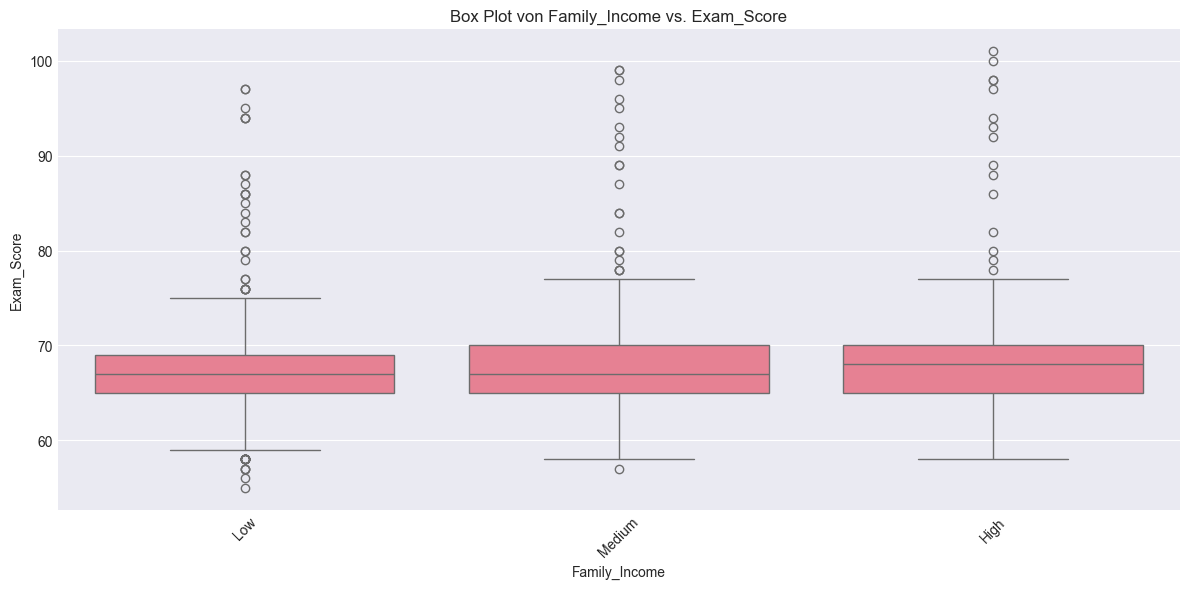

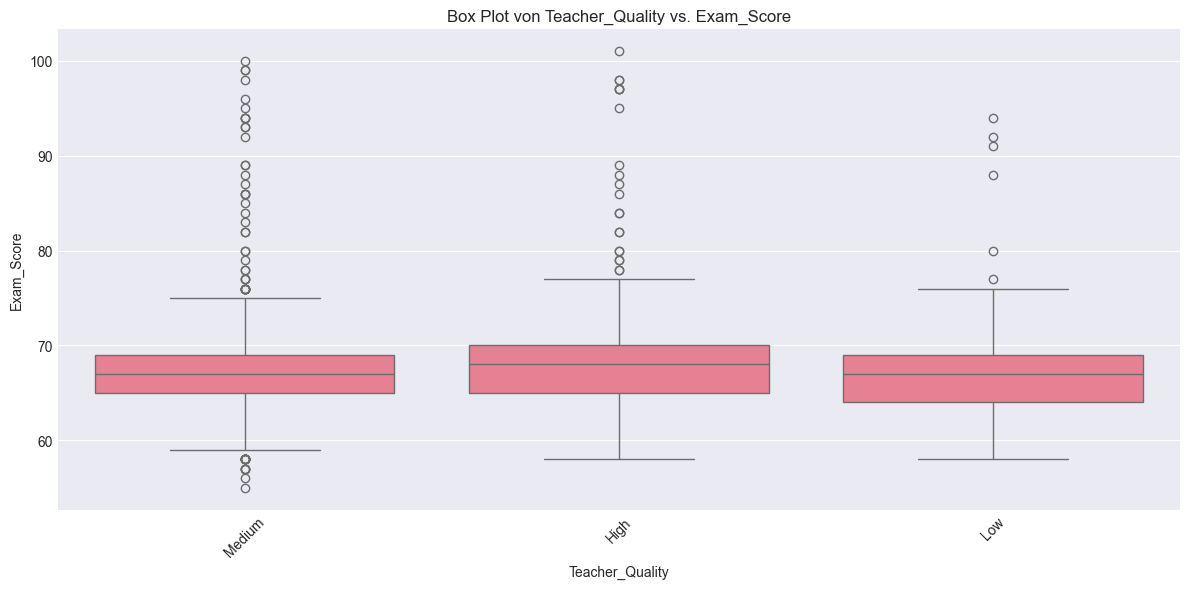

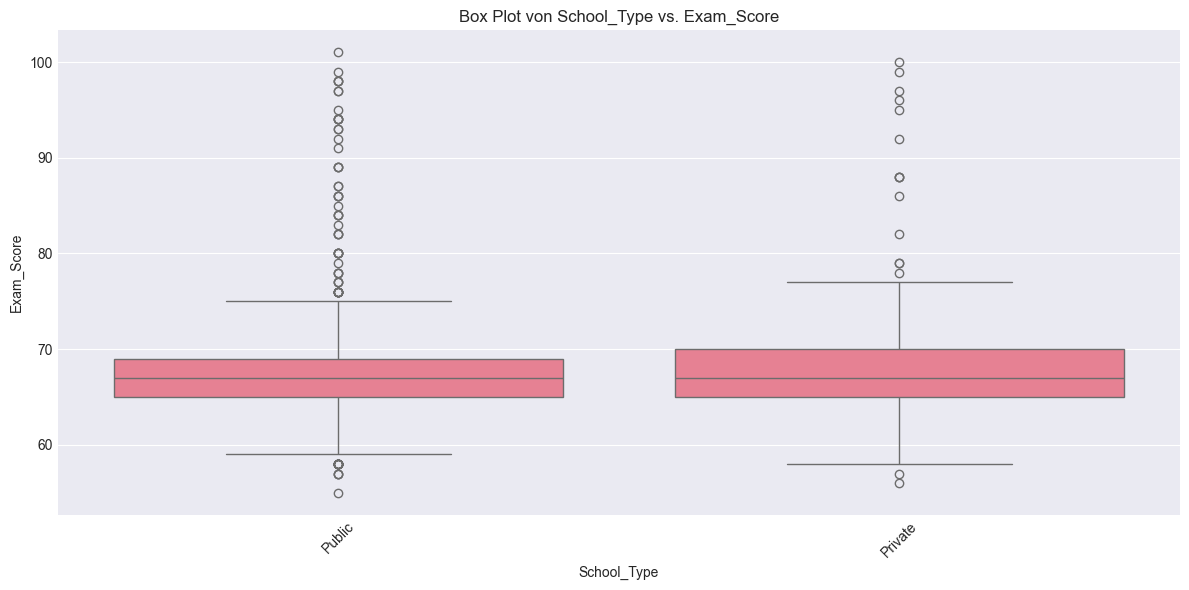

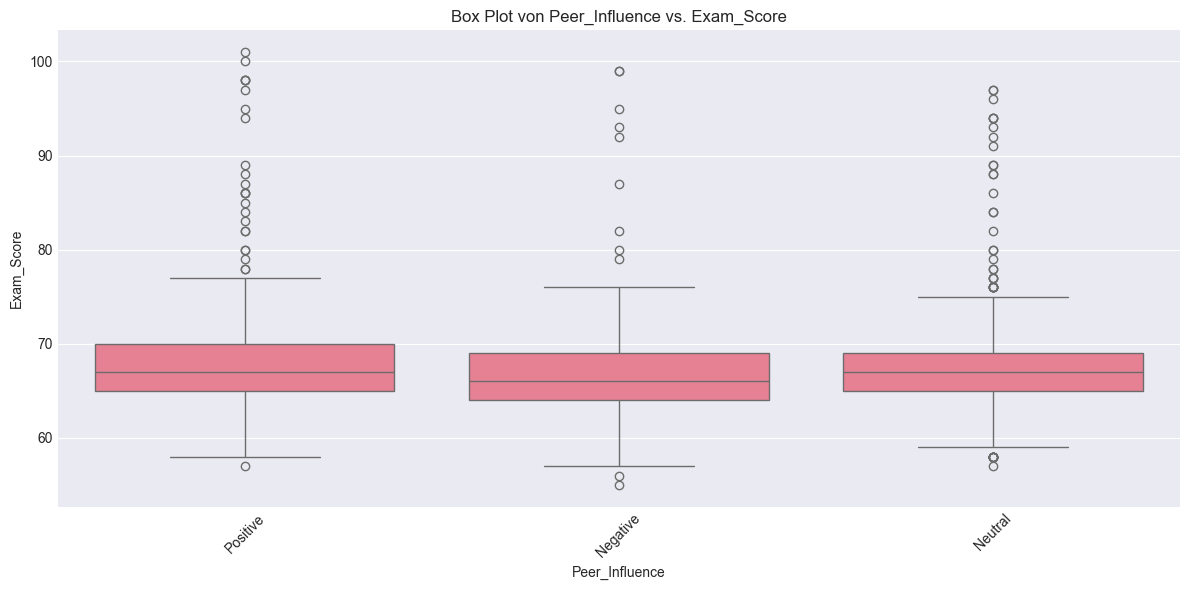

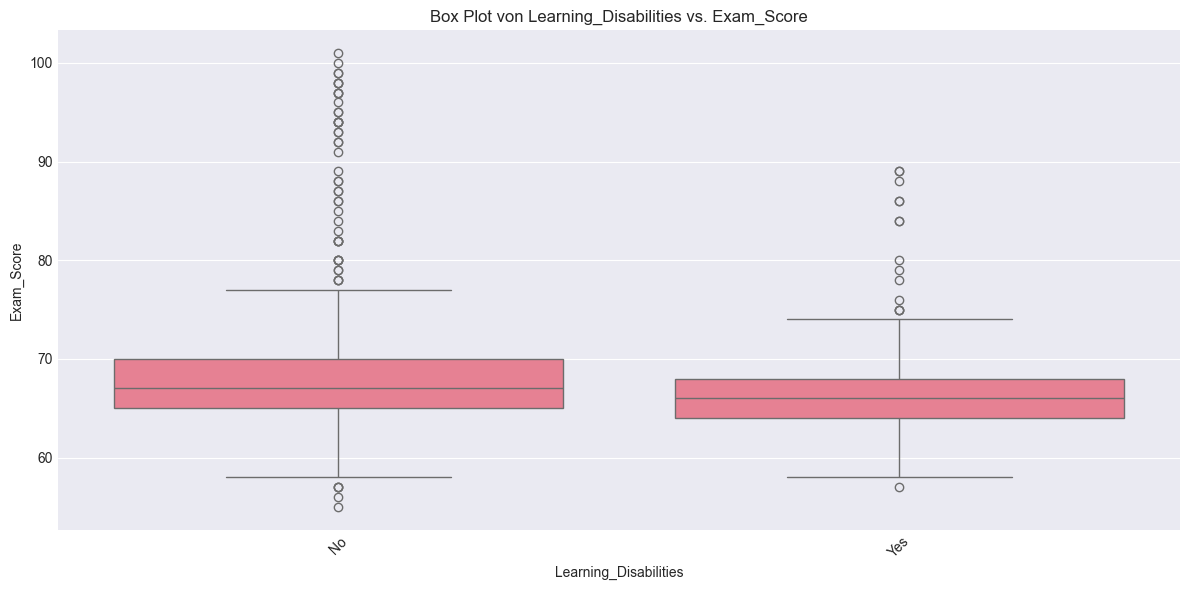

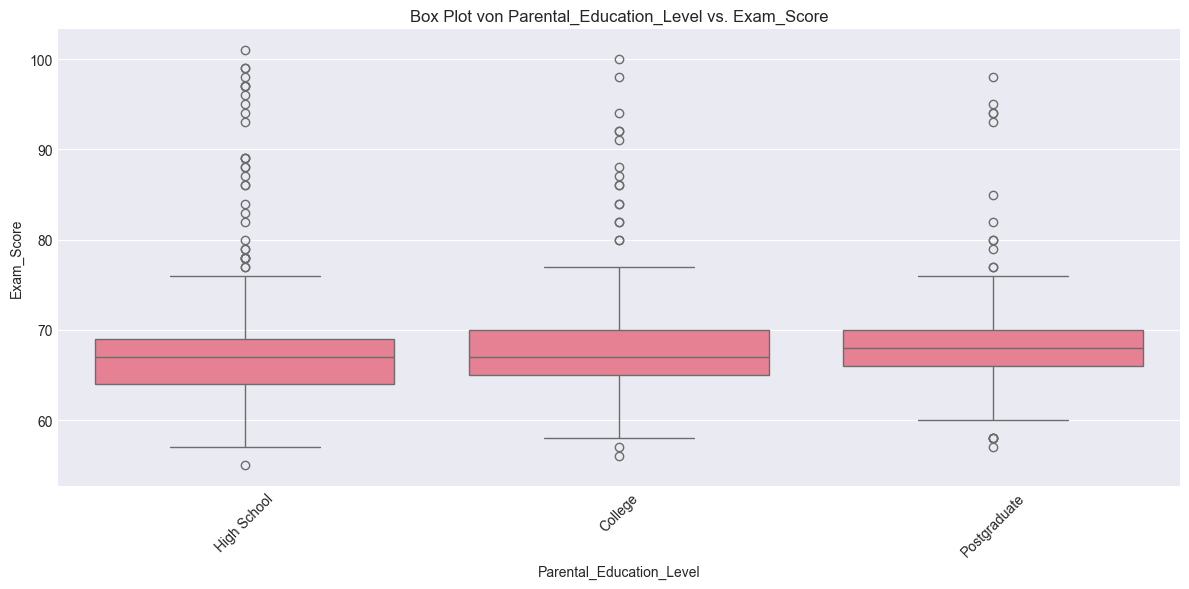

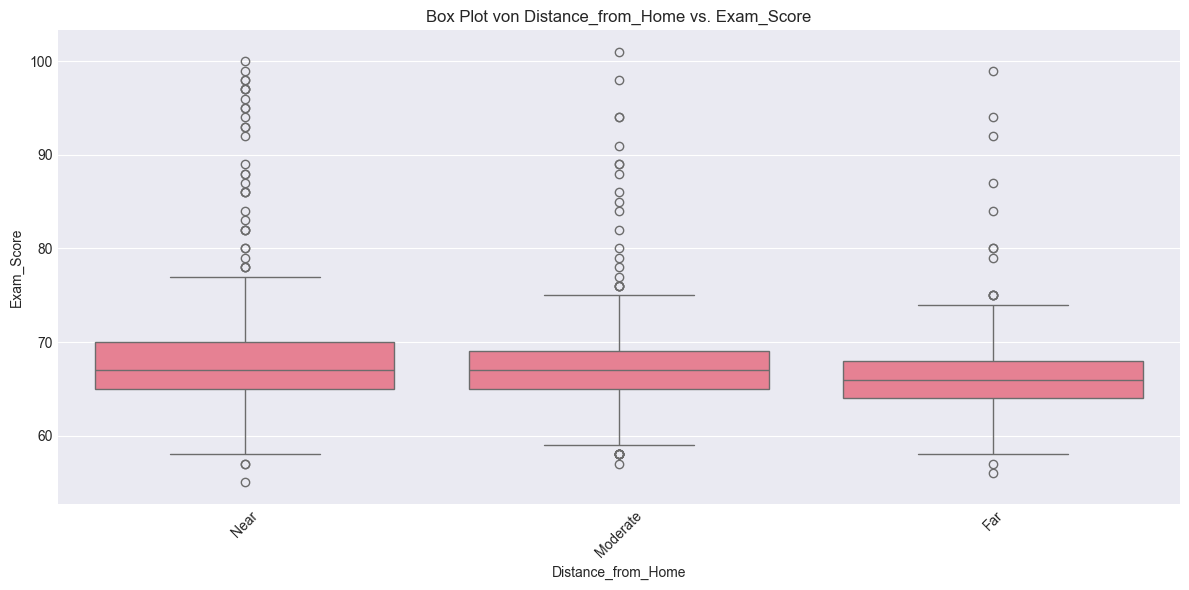

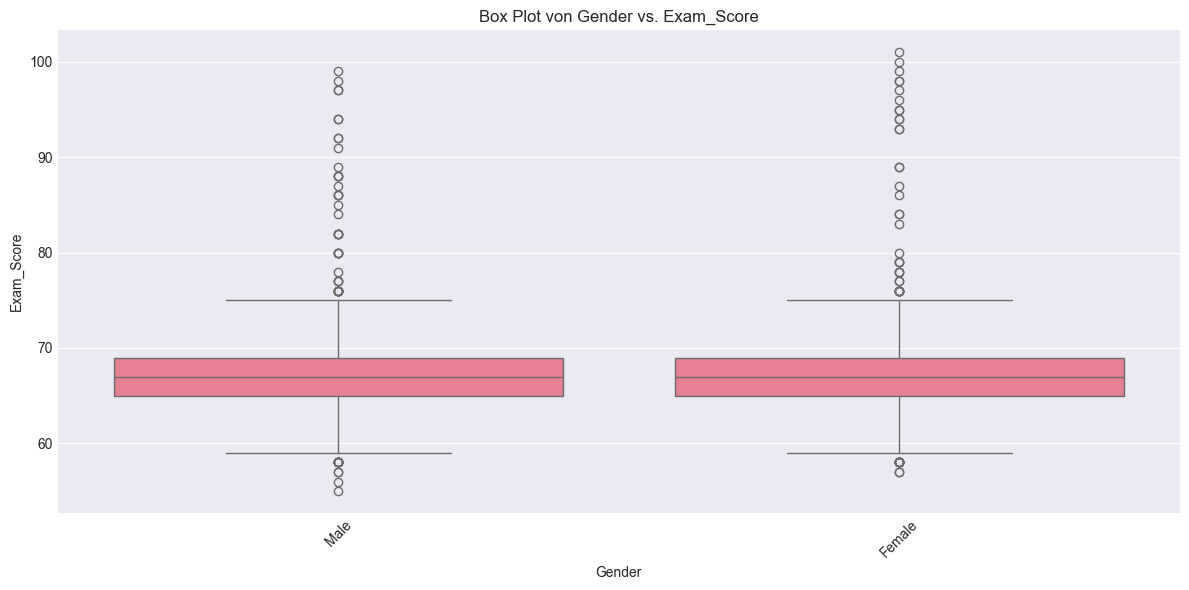

In [10]:
# Korrelationsmatrix für numerische Features erstellen
plt.figure(figsize=(12, 10))
# Nur numerische Spalten für Korrelationsmatrix verwenden
df_numeric = df.select_dtypes(include=[np.number])
correlation_matrix = df_numeric.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Korrelationsmatrix der numerischen Features')
plt.show()


# TODO: Scatter Plots für wichtigste numerische Features vs. Exam_Score
important_features = correlation_matrix['Exam_Score'].abs().nlargest(5).index
for col in important_features:
    if col != 'Exam_Score':
        plt.figure(figsize=(8, 6))
        plt.scatter(df[col], df['Exam_Score'], alpha=0.7)
        plt.title(f'Scatter Plot von {col} vs. Exam_Score')
        plt.xlabel(col)
        plt.ylabel('Exam_Score')
        plt.show()

# TODO: Box Plots für kategorische Features vs. Exam_Score
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=col, y='Exam_Score', data=df)
    plt.title(f'Box Plot von {col} vs. Exam_Score')
    plt.xlabel(col)
    plt.ylabel('Exam_Score')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### 3.5 Multivariate Analyse und Ausreißererkennung

---

In [ ]:
# TODO: Pairplot für ausgewählte wichtige Features

# TODO: Ausreißer identifizieren (z.B. mit IQR-Methode oder Z-Score)

# TODO: Entscheidung über Umgang mit Ausreißern dokumentieren

### 3.6 Wichtigste Erkenntnisse aus der EDA

**Zusammenfassung der EDA-Ergebnisse:**

---

# TODO: Hier die wichtigsten Erkenntnisse aus der EDA auflisten:
# - Anzahl Features und Beobachtungen
# - Fehlende Werte
# - Wichtigste Korrelationen mit Zielvariable
# - Auffällige Muster oder Ausreißer
# - Verteilung der Zielvariable
# etc.

---

## (e) Pipeline

### 4.1 Data Preprocessing und Feature Engineering

---

In [ ]:
# Train-Test Split vorbereiten
# TODO: Daten in X (Features) und y (Target) aufteilen

# TODO: Train-Test Split durchführen (z.B. 80/20 oder 70/30)
# X_train, X_test, y_train, y_test = train_test_split(...)

In [ ]:
# Feature Engineering
# TODO: Ggf. neue Features erstellen basierend auf EDA-Erkenntnissen
# Beispiele:
# - Interaktionen zwischen Features
# - Binning kontinuierlicher Variablen
# - Feature Transformationen (log, polynomial, etc.)

### 4.2 Pipeline Aufbau

Erstellung einer ML-Pipeline für automatisierte und reproduzierbare Datenverarbeitung

---

In [ ]:
# TODO: Numerische und kategorische Features identifizieren
# numerical_features = [...]
# categorical_features = [...]

# TODO: Preprocessing Pipeline für numerische Features erstellen
# numerical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='median')),
#     ('scaler', StandardScaler())
# ])

# TODO: Preprocessing Pipeline für kategorische Features erstellen
# categorical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('encoder', OneHotEncoder(handle_unknown='ignore'))
# ])

# TODO: ColumnTransformer erstellen
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numerical_transformer, numerical_features),
#         ('cat', categorical_transformer, categorical_features)
#     ])

# TODO: Pipeline mit Preprocessor testen
# preprocessor.fit(X_train)
# X_train_transformed = preprocessor.transform(X_train)

---

## (f) No Free Lunch

### 5.1 Auswahl geeigneter Lernalgorithmen

Gemäß dem **No Free Lunch Theorem** gibt es keinen universell besten Algorithmus. Verschiedene Algorithmen müssen für dieses spezifische Problem getestet werden.

**Ausgewählte Algorithmen für dieses Regressionsproblem:**

1. **Linear Regression** - Baseline-Modell, schnell und interpretierbar
2. **Ridge Regression** - Regularisierte lineare Regression (L2)
3. **Lasso Regression** - Regularisierte lineare Regression (L1, Feature Selection)
4. **ElasticNet** - Kombination aus Ridge und Lasso
5. **Decision Tree Regressor** - Nicht-lineares Modell, interpretierbar
6. **Random Forest Regressor** - Ensemble-Methode, robust
7. **Gradient Boosting Regressor** - Leistungsstarkes Ensemble-Modell
8. **Support Vector Regressor (SVR)** - Kernel-basiertes Modell
9. **K-Nearest Neighbors (KNN)** - Instanz-basiertes Lernen

---

In [ ]:
# TODO: Dictionary mit allen zu testenden Modellen erstellen
# models = {
#     'Linear Regression': LinearRegression(),
#     'Ridge': Ridge(),
#     'Lasso': Lasso(),
#     'ElasticNet': ElasticNet(),
#     'Decision Tree': DecisionTreeRegressor(random_state=42),
#     'Random Forest': RandomForestRegressor(random_state=42),
#     'Gradient Boosting': GradientBoostingRegressor(random_state=42),
#     'SVR': SVR(),
#     'KNN': KNeighborsRegressor()
# }

---

## (g) Validierung

### 6.1 Kreuzvalidierung der Modelle

Verwendung von K-Fold Cross-Validation für robuste Performance-Bewertung

---

In [ ]:
# TODO: Funktion zur Evaluation aller Modelle mit Cross-Validation erstellen

# TODO: Für jedes Modell:
# - Pipeline erstellen (Preprocessor + Modell)
# - Cross-Validation durchführen (z.B. 5-Fold oder 10-Fold)
# - RMSE, MAE, R² berechnen
# - Ergebnisse speichern

# TODO: Ergebnisse in DataFrame sammeln und sortieren

# TODO: Visualisierung der Modell-Performance (Barplot)

### 6.2 Hyperparameter-Tuning

Optimierung des besten Modells durch systematische Hyperparameter-Suche

---

In [ ]:
# TODO: Bestes Modell aus Cross-Validation auswählen

# TODO: Hyperparameter-Grid definieren für das beste Modell
# param_grid = {
#     'regressor__parameter1': [...],
#     'regressor__parameter2': [...],
# }

# TODO: GridSearchCV oder RandomizedSearchCV durchführen
# grid_search = GridSearchCV(
#     pipeline,
#     param_grid,
#     cv=5,
#     scoring='neg_root_mean_squared_error',
#     n_jobs=-1,
#     verbose=1
# )

# TODO: Beste Parameter anzeigen

# TODO: Performance mit optimierten Hyperparametern bewerten

### 6.3 Final Testing auf Test-Set

Evaluation des finalen Modells auf bisher ungesehenen Daten

---

In [ ]:
# TODO: Finales Modell auf Test-Set evaluieren
# y_pred = final_model.predict(X_test)

# TODO: Metriken berechnen
# rmse = mean_squared_error(y_test, y_pred, squared=False)
# mae = mean_absolute_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# TODO: Visualisierung der Vorhersagen
# - Predicted vs Actual Scatter Plot
# - Residuen Plot
# - Feature Importance (falls verfügbar)

---

## (h) Entscheid

### 7.1 Modellauswahl und Begründung

---

**Ausgewähltes Modell:** [Modellname einfügen]

**Begründung der Wahl:**

TODO: Begründung basierend auf folgenden Kriterien:

1. **Performance-Metriken:**
   - RMSE: [Wert]
   - R² Score: [Wert]
   - MAE: [Wert]
   - Vergleich mit anderen Modellen

2. **Interpretierbarkeit:**
   - Wie gut können die Vorhersagen erklärt werden?
   - Feature Importance verfügbar?

3. **Komplexität vs. Performance Trade-off:**
   - Ist die zusätzliche Komplexität durch bessere Performance gerechtfertigt?

4. **Robustheit:**
   - Wie stabil sind die Ergebnisse über verschiedene Cross-Validation Folds?

5. **Praktikabilität:**
   - Training- und Inferenzzeit
   - Ressourcenanforderungen

6. **Erfüllung der Zielvorgabe:**
   - Wurde RMSE < 5.0 erreicht?

**Zusammenfassung:** [Kurze Zusammenfassung der Entscheidung]

---

### 7.2 Feature Importance und Modellinterpretation

---

In [ ]:
# TODO: Feature Importance extrahieren (falls verfügbar)
# Für Tree-based Modelle: feature_importances_
# Für lineare Modelle: Koeffizienten

# TODO: Top 10 wichtigste Features visualisieren

# TODO: Interpretation der wichtigsten Features
# Welche Faktoren haben den größten Einfluss auf die Exam_Score?

---

## (i) Schlussfolgerung und Ausblick

### 8.1 Zusammenfassung der Ergebnisse

---

**Erreichte Ziele:**

TODO: Zusammenfassung der wichtigsten Erkenntnisse:

1. **Datenverständnis:**
   - [Anzahl Samples und Features]
   - [Wichtigste Einflussfaktoren identifiziert]

2. **Modellperformance:**
   - [Bestes Modell und erreichte Metriken]
   - [Vergleich mit Zielvorgabe]

3. **Praktische Implikationen:**
   - [Was bedeuten die Ergebnisse für den Bildungssektor?]
   - [Welche Handlungsempfehlungen lassen sich ableiten?]

4. **Herausforderungen:**
   - [Welche Schwierigkeiten gab es?]
   - [Limitationen des Modells]

---

### 8.2 Weiterführende Untersuchungen

**Mögliche Verbesserungen und zukünftige Arbeiten:**

1. **Erweiterte Feature Engineering:**
   - Polynomial Features
   - Interaktionsterme zwischen wichtigen Features
   - Zeitbasierte Features (falls relevant)

2. **Weitere Algorithmen:**
   - XGBoost, LightGBM, CatBoost
   - Neural Networks (MLPRegressor)
   - Stacking Ensemble

3. **Datenqualität:**
   - Sammlung zusätzlicher Daten
   - Verbesserung der Datenqualität
   - Behandlung von Imbalance (falls vorhanden)

4. **Modellinterpretation:**
   - SHAP Values für detaillierte Erklärungen
   - LIME für lokale Interpretierbarkeit
   - Partial Dependence Plots

5. **Deployment:**
   - Entwicklung einer Web-App für Vorhersagen
   - API-Entwicklung
   - Monitoring der Modellperformance in Produktion

6. **Domänenspezifische Ansätze:**
   - Segmentierung nach Studentengruppen
   - Unterschiedliche Modelle für verschiedene Schulstufen
   - Integration von Zeitreihenanalyse (Entwicklung über mehrere Semester)

---

---

## (j) Referenzen

### Datenquelle

TODO: Quelle des Datensatzes angeben
- **Datensatz:** StudentPerformanceFactors.csv
- **Herkunft:** [URL oder Quelle einfügen]
- **Beschreibung:** [Kurze Beschreibung der Datenherkunft]

### Literatur und Quellen

TODO: Verwendete Quellen auflisten

**Bücher:**
1. Géron, A. (2019). *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow* (2nd ed.). O'Reilly Media.
2. James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). *An Introduction to Statistical Learning*. Springer.

**Papers:**
1. [Relevante wissenschaftliche Publikationen zum Thema Student Performance Prediction]

**Online-Ressourcen:**
1. Scikit-learn Documentation: https://scikit-learn.org/
2. Pandas Documentation: https://pandas.pydata.org/
3. Seaborn Documentation: https://seaborn.pydata.org/
4. [Weitere verwendete Online-Ressourcen]

**Code-Quellen:**
- [Falls Code von anderen Quellen verwendet wurde, hier dokumentieren]

---

## Eigenständigkeitserklärung

Hiermit bestätige ich / bestätigen wir, dass ich / wir die vorliegende Arbeit selbständig verfasst und keine anderen als die angegebenen Hilfsmittel benutzt habe/haben. Die Stellen der Arbeit, die dem Wortlaut oder dem Sinn nach anderen Werken (dazu zählen auch Internetquellen) entnommen sind, wurden unter Angabe der Quelle kenntlich gemacht.

**Datum:** [Datum einfügen]

**Unterschrift(en):** [Name(n) einfügen]

---

**Ende des Dokuments**